## HW3

### NAME: Yuhao Wang
### UNI: yw3204

#### Problem 1

Our objective is to solve the following optimization problem:

$min_{f \in \mathcal{H}} R(f)$, where $\mathcal{H} = \{f: \mathbb{R}^d \rightarrow [K]|f \; integrable\}$ and $R(f) = \int_{\mathbb{R}^d} R(f|x)p(x)dx$.

Due to the monotonicity of the integral, the problem is then equivalent to:

$min_{f \in \mathcal{H}} R(f|x)= \Sigma_{y \in [K]} L^{0-1}(y, f(x))P(y|x)$.

Further, we can rewrite $R(f|x)$:

$R(f|x)$

$= \Sigma_{y \in [K]} I_{\{y \ne f(x)\}} P(y|x)$

$= \Sigma_{y \in [K]} (1-I_{\{y = f(x)\}}) P(y|x)$

$= \Sigma_{y \in [K]} P(y|x) - \Sigma_{y \in [K]} I_{\{y = f(x)\}} P(y|x)$

$= 1 - \Sigma_{y \in [K]} I_{\{y = f(x)\}} P(y|x)$

Note that to minimize $R(f|x)$ is equivalent to maximize the following:

$max_{f \in \mathcal{H}} \; \Sigma_{y \in [K]} I_{\{y = f(x)\}} P(y|x)$

Apparently, when $f(x) = argmax_{y \in [K]} P(y|x)$, it reaches the maximum.

Thus, the classifier $f(x) = argmax_{y \in [K]} P(y|x)$ minimizes the risk, which is exactly the Bayes-optimal classifier.

#### Problem 2

In [1]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import numpy as np

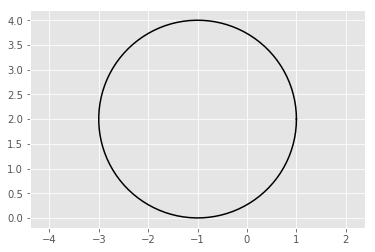

In [2]:
# 1
theta = np.linspace(0, 2*np.pi, 100)
r = 2 
x1 = r*np.cos(theta) - 1
x2 = 2 - r*np.sin(theta) 
plt.axis('equal') 
plt.plot(x1, x2, "k")

plt.show()

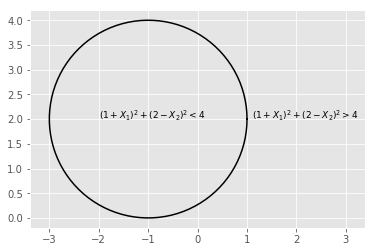

In [3]:
# 2
theta = np.linspace(0, 2*np.pi, 100)
r = 2 
x1 = r*np.cos(theta) - 1
x2 = 2 - r*np.sin(theta) 
plt.axis('equal') 
plt.xlim(-5, 5)
plt.plot(x1, x2, "k")

plt.text(-2, 2, r'$(1+X_1)^2+(2-X_2)^2 < 4$', fontsize=9)
plt.text(1.1, 2, r'$(1+X_1)^2+(2-X_2)^2 > 4$', fontsize=9)

plt.show()

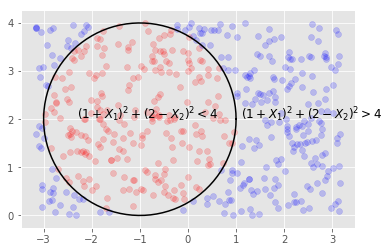

In [4]:
# 3
theta = np.linspace(0, 2*np.pi, 100)
r = 2 
x1 = r*np.cos(theta) - 1
x2 = 2 - r*np.sin(theta) 
plt.axis('equal') 
plt.xlim(-5, 5)
plt.plot(x1, x2, "k")

rand1 = np.random.uniform(-3.2, 3.2, 500)
rand2 = np.random.uniform(0, 4, 500)
dist = np.sqrt((rand1+1)**2 + (rand2-2)**2)
inner = [[rand1[i], rand2[i]] for i in range(len(rand1)) if dist[i] < 2]
outer = [[rand1[i], rand2[i]] for i in range(len(rand1)) if dist[i] > 2]

plt.scatter([row[0] for row in inner], [row[1] for row in inner], c="r", alpha = 0.2)
plt.scatter([row[0] for row in outer], [row[1] for row in outer], c="b", alpha = 0.2)

plt.text(-2.3, 2, r'$(1+X_1)^2+(2-X_2)^2 < 4$', fontsize=12)
plt.text(1.1, 2, r'$(1+X_1)^2+(2-X_2)^2 > 4$', fontsize=12)

plt.show()

Red: (-1, 1)
Blue: (0, 0), (2, 2), (3, 8)

4.

Because it can be rewritten in a linear form: $X_1^2 + X_2^2 +2*X_1 - 4*X_2 + 5> 4$


#### Problem 3

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression

In [15]:
# training data
X3 = np.loadtxt("/Users/apple/Desktop/semester_2/4.Stat_ML/hw/hw3/train_3.txt", delimiter=',')
X5 = np.loadtxt("/Users/apple/Desktop/semester_2/4.Stat_ML/hw/hw3/train_5.txt", delimiter=',')
X8 = np.loadtxt("/Users/apple/Desktop/semester_2/4.Stat_ML/hw/hw3/train_8.txt", delimiter=',')
X = np.concatenate((X3, X5, X8))

y3 = np.repeat(3, len(X3))
y5 = np.repeat(5, len(X5))
y8 = np.repeat(8, len(X8))
y = np.concatenate((y3, y5, y8))

# testing data
test = np.loadtxt("/Users/apple/Desktop/semester_2/4.Stat_ML/hw/hw3/zip_test.txt", delimiter=' ')

y3_test = np.repeat(3, len(test[test[:, 0] == 3]))
y5_test = np.repeat(5, len(test[test[:, 0] == 5]))
y8_test = np.repeat(8, len(test[test[:, 0] == 8]))
y_test = np.concatenate((y3_test, y5_test, y8_test))
                        
X3_test = np.delete(test, 0, 1)[test[:, 0] == 3]
X5_test = np.delete(test, 0, 1)[test[:, 0] == 5]
X8_test = np.delete(test, 0, 1)[test[:, 0] == 8]
X_test = np.concatenate((X3_test, X5_test, X8_test))

In [16]:
# 1. LDA
lda_1 = LinearDiscriminantAnalysis()
lda_1.fit(X, y)

# train
y1 = lda_1.predict(X)
train_err_1 = 1-np.sum(y1 == y)/len(y)

# test
y1_test = lda_1.predict(X_test)
test_err_1 = 1-np.sum(y1_test == y_test)/len(y_test)

In [17]:
# 2. PCA & LDA
pca = PCA(n_components=49)
pca.fit(X)
X_pca = pca.transform(X)
X_pca_test = pca.transform(X_test)

# fit LDA and predict
lda_2 = LinearDiscriminantAnalysis()
lda_2.fit(X_pca, y)

# train
y2 = lda_2.predict(X_pca)
train_err_2 = 1-np.sum(y2 == y)/len(y)

# test
y2_test = lda_2.predict(X_pca_test)
test_err_2 = 1-np.sum(y2_test == y_test)/len(y_test)

In [18]:
# 3. filter & LDA
# help function
def filter(arr, size = 16, step = 2):
    # size: the length or width of image
    n = size // step
    res = np.zeros(n**2)
    for i in range(n):
        for j in range(n):
            t1 = i*step*size + j*step
            t2 = i*step*size + j*step + 1
            t3 = i*step*size + j*step + size
            t4 = i*step*size + j*step + size + 1
            res[i*n + j] = np.mean([arr[t1], arr[t2], arr[t3], arr[t4]])
    return res

# filter step
X_filter = np.zeros((len(X), 64))
for i in range(len(X)):
    X_filter[i] = filter(X[i])

X_filter_test = np.zeros((len(X_test), 64))
for i in range(len(X_test)):
    X_filter_test[i] = filter(X_test[i])

# fit LDA 
lda_3 = LinearDiscriminantAnalysis()
lda_3.fit(X_filter, y)

# train
y3 = lda_3.predict(X_filter)
train_err_3 = 1-np.sum(y3 == y)/len(y)

# test
y3_test = lda_3.predict(X_filter_test)
test_err_3 = 1-np.sum(y3_test == y_test)/len(y_test)

In [19]:
# 4 multiple logistic regression
multi_log_reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=500).fit(X, y)

# train
y4 = multi_log_reg.predict(X)
train_err_4 = 1-np.sum(y4 == y)/len(y)

# test
y4_test = multi_log_reg.predict(X_test)
test_err_4 = 1-np.sum(y4_test == y_test)/len(y_test)

In [20]:
model = ["lda", "pca_lda", "filter_lda", "log_reg"]
train_err = np.array([train_err_1, train_err_2, train_err_3, train_err_4])
test_err = np.array([test_err_1, test_err_2, test_err_3, test_err_4])

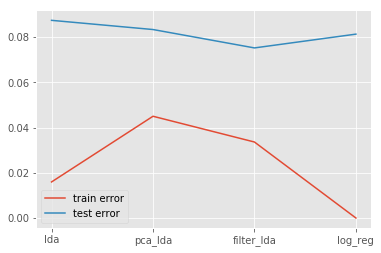

In [21]:
plt.plot(model, train_err)
plt.plot(model, test_err)
plt.legend(("train error", "test error"))

plt.show()

As we can see, test error is always greater than train error. For training, multiple linear regression has the lowest error while for testing LDA with filtering has the lowest error. 